Time series-specific models¶
LSTMs
DeepAR models
AutoArima
ETS, aka exponential smoothing
TBATS
Prophet

Epoch 1/100


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0845 - val_loss: 0.0299
Epoch 2/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0172 - val_loss: 0.0264
Epoch 3/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0132 - val_loss: 0.0195
Epoch 4/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0127 - val_loss: 0.0209
Epoch 5/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0110 - val_loss: 0.0124
Epoch 6/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0096 - val_loss: 0.0126
Epoch 7/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 8/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - val_loss: 0.0111
Epoch 9/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0096
Epoch 10/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0098
Epoch 11/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - val_loss: 0.0085
Epoch 12/100
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

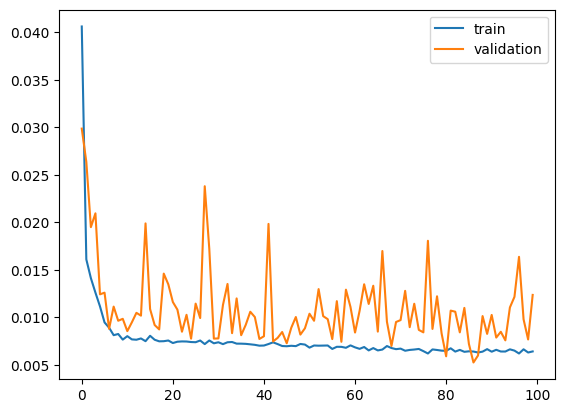

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


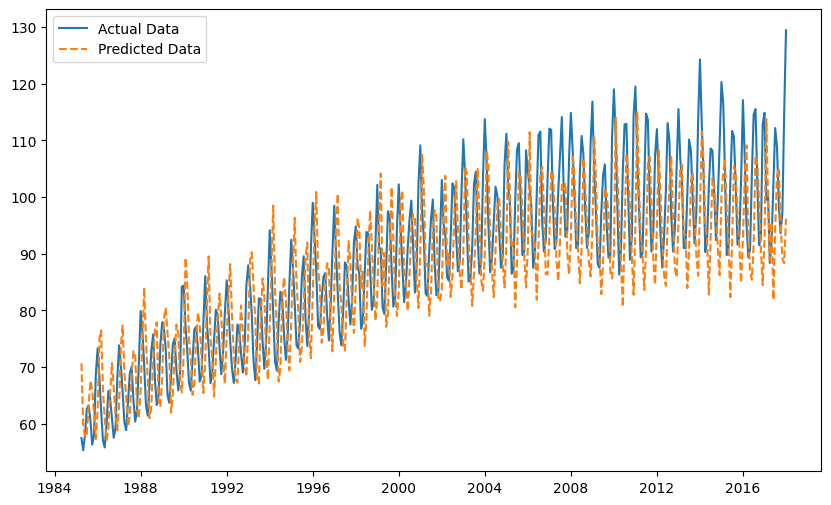

In [4]:
# time series lstm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.metrics import mean_squared_error
from keras.optimizers import Adam


data = pd.read_csv('/teamspace/studios/this_studio/customerproduct/data/csv-dirty/Electric_Production.csv')

#convert csv to dataframe
df = pd.DataFrame(data)

# data preprocessing
df = pd.DataFrame(data)
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(df.values)

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

seq_length = 3
sequences = create_sequences(scaled_values, seq_length)

# Split into input (X) and output (y)
X = sequences[:, :-1]
y = sequences[:, -1]

# Reshape X to be suitable for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length-1, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=1, validation_split=0.2)

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Making predictions
predictions = model.predict(X)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Prepare data for plotting
actual = df.values[seq_length:]
predicted = predictions.flatten()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df.index[seq_length:], actual, label='Actual Data')
plt.plot(df.index[seq_length:], predicted, label='Predicted Data', linestyle='dashed')
plt.legend()
plt.show()
